In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Assume X and y are your features and target variable
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv').dropna()

X = df[['Age','Fare']]
y = df['Survived']
# Initialize a logistic regression model



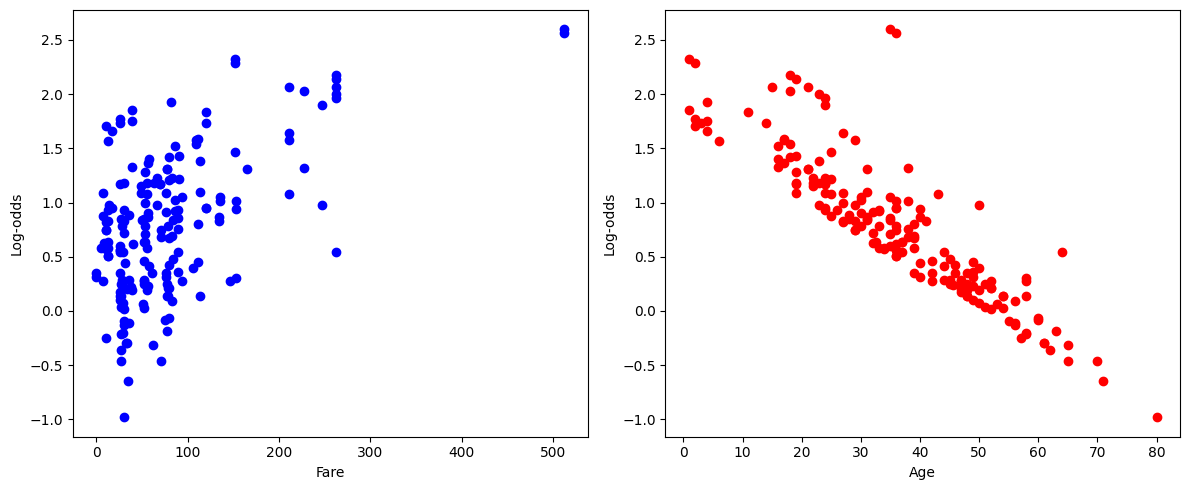

In [3]:
model = LogisticRegression()

# Fit the model on the data
model.fit(X, y)

# Get predictions (probabilities)
predicted = model.predict_proba(X)[:,1]

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Create figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Fare vs log-odds
ax[0].scatter(x=X['Fare'].values, y=log_odds, color='blue')
ax[0].set_xlabel("Fare")
ax[0].set_ylabel("Log-odds")

# Plot Age vs log-odds
ax[1].scatter(x=X['Age'].values, y=log_odds, color='red')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Log-odds")

# Show plots
plt.tight_layout()
plt.show()


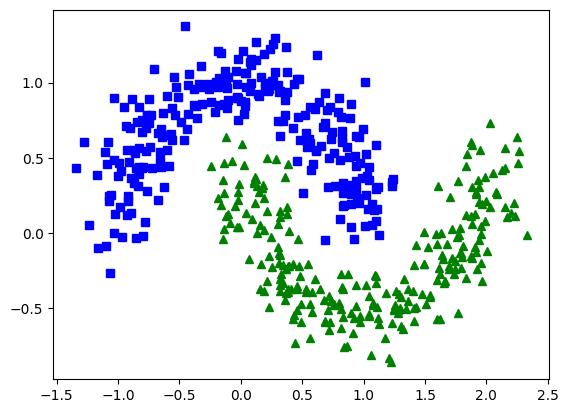

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")


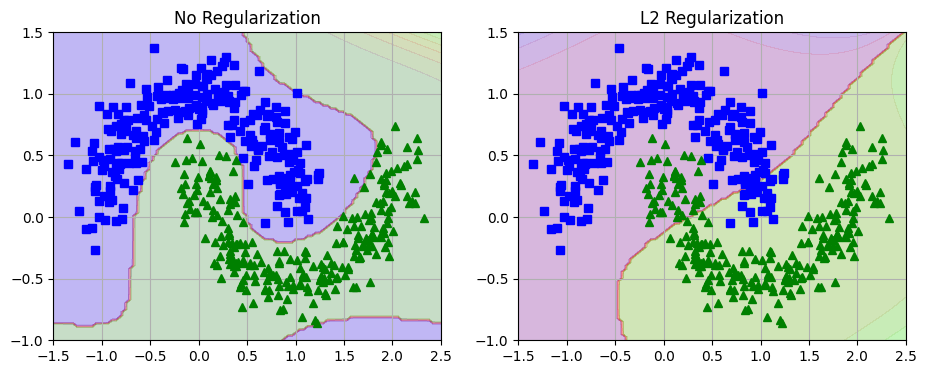

In [5]:
# Create a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')

# Create a function to plot the decision boundary
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Logistic Regression without regularization
model_no_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=1e10, solver="liblinear", random_state=42))
])

# Logistic Regression with L2 regularization
model_l2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=0.001, solver="liblinear", random_state=42))  # C=0.1 implies a stronger regularization
])

model_no_reg.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

# Now, let's plot the decision boundaries
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(model_no_reg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("No Regularization")

plt.subplot(122)
plot_predictions(model_l2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("L2 Regularization")

plt.show()


In [6]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')  # Make sure to provide the correct path to your file

# Drop rows with missing values and select only numerical features
df = df.dropna().select_dtypes(include=['number'])

df.drop(columns=['PassengerId'],inplace=True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [7]:
# Define features and target variables
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42,C=0.5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the model's coefficients
coefficients = model.coef_
print("Model coefficients:", coefficients)

# Extract original column names from DataFrame
column_names = df.drop('Survived', axis=1).columns

# Features with coefficients that are 0 were effectively eliminated by the L1 regularization
eliminated_features = column_names[coefficients[0] == 0]
print("Eliminated features:", eliminated_features)


Model coefficients: [[-0.10313963 -0.38245202  0.         -0.10773421  0.26175659]]
Eliminated features: Index(['SibSp'], dtype='object')
